<a href="https://colab.research.google.com/github/asu-trans-ai-lab/OSM2GMNS/blob/master/osm2gmns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 0: load the OSM file from the repository of OSM testing datasets**

In [1]:
!rm -rf ./osm_test_data_set/
!git clone https://github.com/asu-trans-ai-lab/osm_test_data_set

%cd osm_test_data_set

Cloning into 'osm_test_data_set'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 94 (delta 20), reused 73 (delta 9), pack-reused 0
Unpacking objects: 100% (94/94), done.
/content/osm_test_data_set


Check the file icon on the left hand side, makesure file map.osm exists.

**Step 1: install python packages**

In [2]:
!pip install osm2gmns
!pip install grid2demand


     |████████████████████████████████| 51kB 2.3MB/s 
     |████████████████████████████████| 1.0MB 6.9MB/s 
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


**Step 2: convert OSM to GMNS Files**

osm2gmns, version 0.4.2


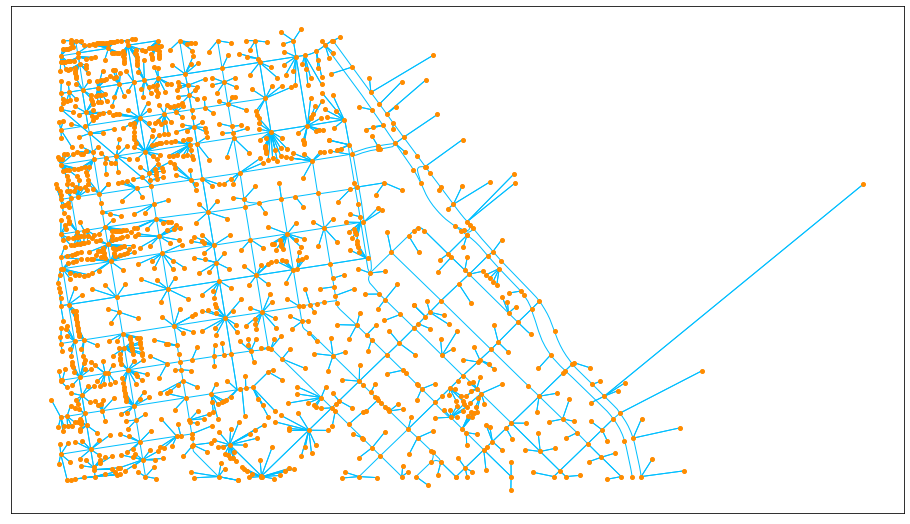

Figure is saved to network.jpg


In [3]:
import osm2gmns as og
net = og.getNetFromOSMFile('market_street.osm', POIs=True)
og.connectPOIWithNet(net)
og.generateNodeActivityInfo(net)
og.consolidateComplexIntersections(net)
og.outputNetToCSV(net, output_folder='consolidated')
og.outputNetToCSV(net)
og.show(net)
og.saveFig(net)

Check node.csv, link.csv and poi.csv exist in the left-hand-side Colab folder.

In [6]:
import osm2gmns as og
net = og.getNetFromPBFFile('market_street.pdf', POIs=True)  # getNetFromPBFFile other than getNetFromOSMFile
og.connectPOIWithNet(net)
og.generateNodeActivityInfo(net)
og.consolidateComplexIntersections(net)
og.outputNetToCSV(net, output_folder='consolidated')
og.outputNetToCSV(net)
og.show(net)
og.saveFig(net)

FileNotFoundError: ignored

**Step 3: Run grid2demand to generate demand based POI rates**

In [ ]:
import grid2demand as gd
"Step 1: Read Input Network Data"
net = gd.ReadNetworkFiles('')

"Step 2: Partition Grid into cells"
zone = gd.PartitionGrid(number_of_x_blocks=5, number_of_y_blocks=5)
# user can customize number of grid cells or cell's width and height

"Step 3: Get Production/Attraction Rates of Each Land Use Type with a Specific Trip Purpose"
triprate = gd.GetPoiTripRate(trip_rate_folder='',trip_purpose=1)
# user can customize poi_trip_rate.csv and trip purpose

"Step 4: Define Production/Attraction Value of Each Node According to POI Type"
nodedemand = gd.GetNodeDemand()

"Step 5: Calculate Zone-to-zone Accessibility Matrix by Centroid-to-centroid Straight Distance"
accessibility = gd.ProduceAccessMatrix(latitude=30, accessibility_folder='')
# user can customize the latitude of the research area and accessibility.csv

"Step 6: Apply Gravity Model to Conduct Trip Distribution"
demand = gd.RunGravityModel(trip_purpose=1, a=None, b=None, c=None)
# user can customize friction factor coefficients under a specific trip purpose
"Step 7: Generate Agent"
demand = gd.GenerateAgentBasedDemand()

2021-04-08 01:00:44,303 - grid2demand_0330a.py[line:361] - WARNING: Latitude is not defined for network partition. Default latitude is 30 degree!
2021-04-08 01:00:44,303 - grid2demand_0330a.py[line:361] - WARNING: Latitude is not defined for network partition. Default latitude is 30 degree!
2021-04-08 01:00:44,303 - grid2demand_0330a.py[line:361] - WARNING: Latitude is not defined for network partition. Default latitude is 30 degree!
2021-04-08 01:00:44,427 - grid2demand_0330a.py[line:848] - WARNING: poi_trip_rate.csv does not exist in the current folder. Default values will be used.
2021-04-08 01:00:44,427 - grid2demand_0330a.py[line:848] - WARNING: poi_trip_rate.csv does not exist in the current folder. Default values will be used.
2021-04-08 01:00:44,427 - grid2demand_0330a.py[line:848] - WARNING: poi_trip_rate.csv does not exist in the current folder. Default values will be used.
2021-04-08 01:00:44,456 - grid2demand_0330a.py[line:971] - WARNING: Production value of residential nod


Number of zones including virtual zones = 135

Tab of trip purposes used in grid2demand =  1

Total number of poi nodes with unmatched production rate =  1325
Total number of poi nodes with unmatched attraction rate =  605

Latitude used for grid2demand =  30

Number of OD pairs =  18225

Largest accessibility of distance = 3.38 km
Average accessibility of distance = 1.43 km

Default values of friction factor coefficients under trip purpose 1: 
a= 28507 
b= -0.02 
c= -0.123

Zone-to-zone OD pair with largest volume is from Gate20 to Gate6
Origin zone with largest production volume is Gate20
Destination zone with largest attraction volume is Gate20

Number of agents =  255034


**Step 4: Download data files**



In [ ]:
% cd ../
!zip -r /content/osm_test_data_set/map.zip /content/osm_test_data_set/


/content/osm_test_data_set/datasets/osm_test_data_set
  adding: content/osm_test_data_set/ (stored 0%)
  adding: content/osm_test_data_set/doc/ (stored 0%)
  adding: content/osm_test_data_set/doc/Lecture Network Design for Accessibility.pptx (deflated 5%)
  adding: content/osm_test_data_set/doc/accessibility in practice.pptx.pptx (deflated 2%)
  adding: content/osm_test_data_set/doc/Accessibility - ACSP 2015.pptx (deflated 10%)
  adding: content/osm_test_data_set/test_gtfs.ipynb (deflated 68%)
  adding: content/osm_test_data_set/README.md (stored 0%)
  adding: content/osm_test_data_set/.git/ (stored 0%)
  adding: content/osm_test_data_set/.git/HEAD (stored 0%)
  adding: content/osm_test_data_set/.git/index (deflated 45%)
  adding: content/osm_test_data_set/.git/info/ (stored 0%)
  adding: content/osm_test_data_set/.git/info/exclude (deflated 28%)
  adding: content/osm_test_data_set/.git/logs/ (stored 0%)
  adding: content/osm_test_data_set/.git/logs/HEAD (deflated 29%)
  adding: conten

In [ ]:
from google.colab import files
files.download("/content/osm_test_data_set/map.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 5: Visualization using GMNS tool:**
By simply uploading node.csv and link.csv at https://asu-trans-ai-lab.github.io/index.html#,  
 you can easily create custom online maps for any GMNS network files. 
To view zone and demand information please visit this page to use QGIS/NeXTA tools. https://github.com/asu-trans-ai-lab/traffic-engineering-and-analysis/blob/master/undergraduate_student_project/QGIS%20For%20Gmns%20User%20Guide_v0.5.pdf 

**Option for downloading OSM map.osm file for the area of interest**

On OpenStreetMap homepage, click the Export button to enter Export mode. Before downloading, you may need to span and zoom in/out the map to make sure that your target area is properly shown on the screen. Or, you can use Manually select a different area to select your area more precisely. Click the Export button in blue to export the network you want.

Note that if the target area is too large, you may get an error message: “You requested too many nodes (limit is 50000). Either request a smaller area, or use planet.osm”. In this case, you can always click Overpass API to download the network you need via a mirror site.

You can uploda the file as shown below to Google Colab environment and repeat from step 2 of running OSM2GMNS to step 5



In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

